# Part 2: Joining Datasets
In this part, i will look to analyze movie ratings with two other available datasets. These datasets share the same ratings but have a different set of movies and features, so i will have to merge them before analyzing. Then I will check to see if the results here match results for the previous dataset.

In [1]:
import pandas as pd

In [2]:
mov2 = pd.read_csv('data/otherMovies.csv')
mov2.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


I won't need the list of actors here and i will sort the columns before i join with another data set.

In [3]:
mov2 = pd.read_csv('data/otherMovies.csv', usecols=range(5))
mov2.rename(columns={"star_rating":'rating'},inplace=True)
mov2 = mov2.reindex(sorted(mov2.columns), axis=1)
mov2.head()

,content_rating,duration,genre,rating,title
0,R,142,Crime,9.3,The Shawshank Redemption
1,R,175,Crime,9.2,The Godfather
2,R,200,Crime,9.1,The Godfather: Part II
3,PG-13,152,Action,9.0,The Dark Knight
4,R,154,Crime,8.9,Pulp Fiction


In [4]:
mov3 = pd.read_csv('data/movies3.csv')
mov3.head()

,Movie_Name,Certificate,Duration,Year,Rating,Genre,Vote,Gross,Country,Language,Budget
0,Citizen Kane,PG,119,1941,8.3,"Drama, Mystery",361443,1585634,USA,English,839727
1,The Godfather,R,175,1972,9.2,"Crime, Drama",1430061,134966411,USA,English,6000000
2,The Wizard of Oz,PG,102,1939,8.0,"Adventure, Family, Fantasy",350414,2076020,USA,English,2800000
3,The Shawshank Redemption,R,142,1994,9.3,Drama,2083958,28341469,USA,English,25000000
4,Pulp Fiction,R,154,1994,8.9,"Crime, Drama",1628927,107928762,USA,English,8000000


This second dataset has several unnessary columns. I will remove them and rename the remaining columns to match the first dataset.

In [5]:
mov3 = pd.read_csv('data/movies3.csv',usecols=[0,1,2,4,5])
mov3.rename(columns={"Movie_Name":'title',"Certificate":'content_rating', "Duration": "duration",'Rating':'rating','Genre':'genre'}, inplace=True)
mov3 = mov3.reindex(sorted(mov3.columns), axis=1)
mov3.head()

,content_rating,duration,genre,rating,title
0,PG,119,"Drama, Mystery",8.3,Citizen Kane
1,R,175,"Crime, Drama",9.2,The Godfather
2,PG,102,"Adventure, Family, Fantasy",8.0,The Wizard of Oz
3,R,142,Drama,9.3,The Shawshank Redemption
4,R,154,"Crime, Drama",8.9,Pulp Fiction


Since i have both datasets with the same column labels, i can concat them without a problem

In [6]:
mergMov = pd.concat([mov2,mov3])
mergMov.shape

(1479, 5)

Adding a second dataset means there will be some movies repeated twice. So i need to check for duplicates and keep the right unique values.

In [7]:
mergMov.title.duplicated().sum()

397

In [8]:
mergMov[mergMov.title.duplicated(keep='first')].sort_values('title').head()

,content_rating,duration,genre,rating,title
19,Not Rated,96,Drama,8.9,12 Angry Men
35,R,134,"Biography, Drama, History",8.1,12 Years a Slave
13,G,149,"Adventure, Sci-Fi",8.3,2001: A Space Odyssey
466,PG-13,170,"Comedy, Drama",8.4,3 Idiots
432,R,88,"Crime, Drama, Romance",8.0,3-Iron


In [9]:
mergMov[mergMov.title.duplicated(keep='last')].sort_values('title').head()

,content_rating,duration,genre,rating,title
5,NOT RATED,96,Drama,8.9,12 Angry Men
201,R,134,Biography,8.1,12 Years a Slave
110,G,160,Mystery,8.3,2001: A Space Odyssey
60,PG-13,170,Comedy,8.5,3 Idiots
225,R,88,Crime,8.1,3-Iron


In [10]:
mergMov.drop_duplicates(keep='last',subset=['title'],inplace=True)
mergMov.shape

(1082, 5)

# Content Rating

In [11]:
mergMov.content_rating.unique()

array(['PG', 'R', 'PG-13', 'G', 'NOT RATED', 'UNRATED', 'APPROVED',
       'NC-17', nan, 'GP', 'X', 'Not Rated', 'Passed', 'Approved',
       'Not Found'], dtype=object)

In [12]:
mergMov.groupby('content_rating').rating.agg(['count','mean','median']).sort_values('mean',ascending=False)

,count,mean,median
content_rating,,,
Not Found,3,8.233333,8.30
Approved,4,8.125000,8.10
Not Rated,100,8.093000,8.10
Passed,16,8.056250,8.00
GP,4,7.975000,8.05
NOT RATED,27,7.940741,7.90
PG,149,7.914094,7.90
G,45,7.913333,7.90
R,500,7.847400,7.80


# Understanding Ratings
The ratings i am concerned with in this data are as follows: 

**G rating**: All ages admitted. Nothing that would offend parents for viewing by children.

**PG – Parental Guidance Suggested**: Some material may not be suitable for children. Parents urged to give "parental guidance". May contain some material parents might not like for their young children.

**GP**: All ages admitted – Parental guidance suggested. Between PG and G. This rating is between G and PG, and is not used anymore.

**PG-13**: Some material may be inappropriate for children under 13. Parents are urged to be cautious.

**R**: Under 17 requires accompanying parent or adult guardian. 

**NC-17**:  Adults. Only No One 17 and Under Admitted.

In [13]:
contentRatings = {'PG','G'}
rateMov = mergMov[(mergMov.content_rating=='PG') | (mergMov.content_rating=='G') | (mergMov.content_rating=='GP') | (mergMov.content_rating=='PG-13') | (mergMov.content_rating=='R') | (mergMov.content_rating=='NC-17')]
rateMov.groupby('content_rating').rating.agg(['count','mean','median']).sort_values('mean',ascending=False)

,count,mean,median
content_rating,,,
GP,4,7.975000,8.05
PG,149,7.914094,7.90
G,45,7.913333,7.90
R,500,7.847400,7.80
PG-13,198,7.822222,7.80
NC-17,7,7.614286,7.60


Similar to previous findings, movies intended for younger or all ages appear to be rated better on average. Rated R movies are close behind, followed by PG-13 movies.

# Duration
Does the length of run time of a movie affect rating?

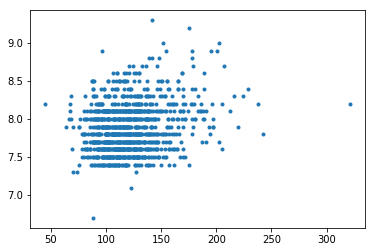

In [15]:
from matplotlib import pyplot as plt
plt.plot(mergMov.duration,mergMov.rating,'.')

In [16]:
mergMov.duration.nunique()

135

Similar to part 1, i will round the length of each movie to nearest 10th number so i can categorize them further

In [158]:
def custom_round(x, base):
    return int(base * round(float(x)/base))

mergMov.duration = mergMov.duration.apply(lambda x: custom_round(x, base=10))
mergMov.head()

,content_rating,duration,genre,rating,title
19,PG,120,Action,8.7,Star Wars
28,R,110,Crime,8.6,Leon: The Professional
43,PG-13,160,Action,8.5,The Dark Knight Rises
64,G,100,Animation,8.4,WALL-E
66,NOT RATED,160,Comedy,8.4,Munna Bhai M.B.B.S.


In [18]:
mergMov.duration.nunique()

21

In [19]:
mergMov.groupby('duration').rating.agg(['count','mean','median']).sort_values('mean',ascending=False)

,count,mean,median
duration,,,
230,1,8.400000,8.40
210,2,8.400000,8.40
180,18,8.255556,8.20
200,10,8.230000,8.10
40,1,8.200000,8.20
320,1,8.200000,8.20
220,3,8.166667,8.30
190,12,8.050000,8.05
170,21,8.014286,8.10


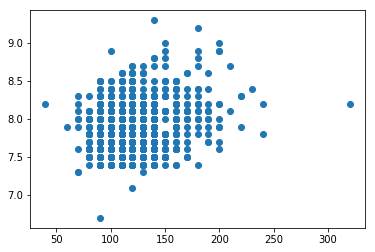

In [20]:
from matplotlib import pyplot as plt
plt.plot(mergMov.duration,mergMov.rating,'o')

There seems to be no clear correlation with the length of a movie and how people rate that movie.

# Genre
Does genre affect movie rating? Are people more critical of certain genres as opposed to others? Some movies have multiple genres (up to 3) stored in a same column, so i will need to split genres into three separate columns. Then aggregate the rating for each genre of each film. 

In [160]:
genres = mergMov.genre
genres.head()

19       Action
28        Crime
43       Action
64    Animation
66       Comedy
Name: genre, dtype: object

In [161]:
genres = genres.str.split(',', expand=True)
genres = genres.set_axis(['genre0','genre1','genre2'], axis=1, inplace=False)
genres.head()

,genre0,genre1,genre2
19,Action,None,None
28,Crime,None,None
43,Action,None,None
64,Animation,None,None
66,Comedy,None,None


After separating genres into multiple columns, i will join them back into the main dataframe containing each rating.

In [162]:
Movies = pd.concat([mergMov, genres], axis=1)
Movies.head()

,content_rating,duration,genre,rating,title,genre0,genre1,genre2
19,PG,120,Action,8.7,Star Wars,Action,None,None
28,R,110,Crime,8.6,Leon: The Professional,Crime,None,None
43,PG-13,160,Action,8.5,The Dark Knight Rises,Action,None,None
64,G,100,Animation,8.4,WALL-E,Animation,None,None
66,NOT RATED,160,Comedy,8.4,Munna Bhai M.B.B.S.,Comedy,None,None


In [163]:
Movies.groupby('genre0').rating.agg(['count','mean','median']).sort_values('mean',ascending=False).head()

,count,mean,median
genre0,,,
Western,5,8.240000,8.30
Documentary,2,8.150000,8.15
Film-Noir,3,8.000000,8.10
Sci-Fi,2,7.950000,7.95
Fantasy,3,7.933333,8.00


I create a function that takes a Pandas Series and adds it to a Dataframe. Here i add the totals of each genre column onto another dataframe (genreDF)

In [151]:
def countGenre(base,section):
    size = section.shape[0]
    size2 = base.shape[0]
    for x in range(size):
        for y in range(size2):
            if(section.iloc[x,2]==base.iloc[y,0]):
                base.iloc[y,1] += section.iloc[x,0]
                base.iloc[y,2] += section.iloc[x,1]
                break;
    return base

Some genres have whitespaces, so i remove the whitespace and duplicate genre categories here.

In [166]:
Movies.genre1 = Movies.genre1.str.replace(' ', '')
Movies.genre2 = Movies.genre2.str.replace(' ', '')
genretypes = pd.concat([Movies['genre0'],Movies['genre1'],Movies['genre2']]).unique()
genretypes = genretypes[~pd.isnull(genretypes)] # remove null values
genreDF = pd.DataFrame(genretypes,columns=['genre'])
genreDF.drop_duplicates(keep = 'last', inplace = True) 
genreDF.describe()

,genre
count,22
unique,22
top,Sci-Fi
freq,1


In [169]:
genretypes = pd.concat([Movies['genre0'],Movies['genre1'],Movies['genre2']]).unique()
genretypes = genretypes[~pd.isnull(genretypes)] # remove null values
genreDF = pd.DataFrame(genretypes,columns=['genre'])
genreDF['count']=0
genreDF['sum']=0
genreDF.sort_values('genre',inplace=True)
genreDF.describe

<bound method NDFrame.describe of           genre  count  sum
0        Action      0    0
5     Adventure      0    0
2     Animation      0    0
6     Biography      0    0
3        Comedy      0    0
1         Crime      0    0
15  Documentary      0    0
4         Drama      0    0
11       Family      0    0
13      Fantasy      0    0
14    Film-Noir      0    0
19      History      0    0
9        Horror      0    0
20        Music      0    0
18      Musical      0    0
7       Mystery      0    0
16      Romance      0    0
12       Sci-Fi      0    0
21        Sport      0    0
8      Thriller      0    0
17          War      0    0
10      Western      0    0>

In [170]:
val1 = Movies.groupby('genre0').rating.agg(['count','sum'])
val1['index']=val1.index
genreDF = countGenre(genreDF,val1)

val2 = Movies.groupby('genre1').rating.agg(['count','sum'])
val2['index']=val2.index
genreDF = countGenre(genreDF,val2)

val3 = Movies.groupby('genre2').rating.agg(['count','sum'])
val3['index']=val3.index
genreDF = countGenre(genreDF,val3)
genreDF

,genre,count,sum
0,Action,158,1245.2
5,Adventure,145,1158.9
2,Animation,73,578.2
6,Biography,98,772.4
3,Comedy,206,1618.7
1,Crime,159,1262.9
15,Documentary,2,16.3
4,Drama,502,4002.4
11,Family,29,232.6
13,Fantasy,38,308.7


In [171]:
genreDF['average']=(genreDF['sum']/genreDF['count']) 
genreDF.sort_values('average',ascending=False)

,genre,count,sum,average
15,Documentary,2,16.3,8.150000
17,War,31,252.0,8.129032
13,Fantasy,38,308.7,8.123684
21,Sport,5,40.5,8.100000
10,Western,16,129.5,8.093750
14,Film-Noir,12,97.0,8.083333
12,Sci-Fi,52,419.2,8.061538
8,Thriller,74,595.9,8.052703
7,Mystery,60,482.8,8.046667
16,Romance,65,522.0,8.030769


Similar to previous dataset, War and Western movies appear to be among the best rated movies. And similar to the previous analysis, Musical, Horror and Comedy appear to be rated most harshly. 

# Conlcusion
Regardless of the different rating methodology of each dataset with their own respective scores, results from all datasets were very similar. Movies intended for all audiences appear to be rated more leniently, while PG-13 rated movies were among the worst rated films. The running time of movies appear to have no strong correlation with how well they were rated.  And movies of certain genres such as War, Fantasy, Western, Sci-Fi were rated among the best, while Musical, Horror and Comedy movies were rated the worst.  Action movies were also rated poorly on average.